In [1]:
import pandas as pd

# Load customer and transaction data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


In [2]:
# Check the column names in each DataFrame
print(customers.columns)
print(transactions.columns)


Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [3]:
# Merge customer data with transaction data on CustomerID
data = pd.merge(customers, transactions, on='CustomerID')

# Check the first few rows of the merged data
print(data.head())


  CustomerID      CustomerName         Region  SignupDate TransactionID   
0      C0001  Lawrence Carroll  South America  2022-07-10        T00015  \
1      C0001  Lawrence Carroll  South America  2022-07-10        T00932   
2      C0001  Lawrence Carroll  South America  2022-07-10        T00085   
3      C0001  Lawrence Carroll  South America  2022-07-10        T00445   
4      C0001  Lawrence Carroll  South America  2022-07-10        T00436   

  ProductID      TransactionDate  Quantity  TotalValue   Price  
0      P054   2024-01-19 3:12:55         2      114.60   57.30  
1      P022   2024-09-17 9:01:18         3      412.62  137.54  
2      P096   2024-04-08 0:01:00         2      614.94  307.47  
3      P083   2024-05-07 3:11:44         2      911.44  455.72  
4      P029  2024-11-02 17:04:16         3     1300.92  433.64  


In [4]:
data = pd.merge(customers, transactions, on='CustomerID', how='left')


In [5]:
# Feature engineering: Total spent and purchase frequency
data['total_spent'] = data.groupby('CustomerID')['TotalValue'].transform('sum')
data['purchase_frequency'] = data.groupby('CustomerID')['TransactionID'].transform('count')

# Drop duplicate rows after the aggregation
data = data.drop_duplicates(subset='CustomerID')

# Check the data to ensure feature engineering worked
print(data[['CustomerID', 'total_spent', 'purchase_frequency']].head())


   CustomerID  total_spent  purchase_frequency
0       C0001      3354.52                   5
5       C0002      1862.74                   4
9       C0003      2725.38                   4
13      C0004      5354.88                   8
21      C0005      2034.24                   3


In [6]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = data[['total_spent', 'purchase_frequency']]  # You can add more features like 'age', 'region', etc.

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [7]:
from sklearn.cluster import KMeans

# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the DataFrame
data['Cluster'] = clusters

# Check the data with cluster labels
print(data[['CustomerID', 'Cluster']].head())


   CustomerID  Cluster
0       C0001        2
5       C0002        0
9       C0003        0
13      C0004        1
21      C0005        0


C:\Users\ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


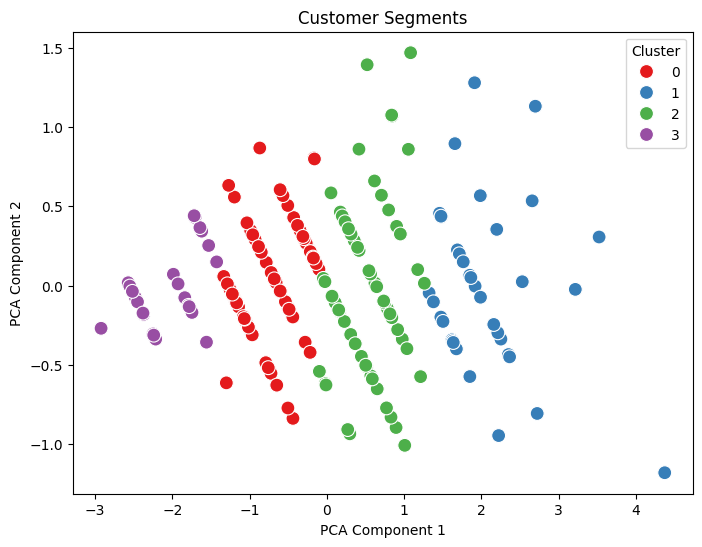

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [9]:
# Save the clustered data to a new CSV file
data.to_csv('customer_segments.csv', index=False)
